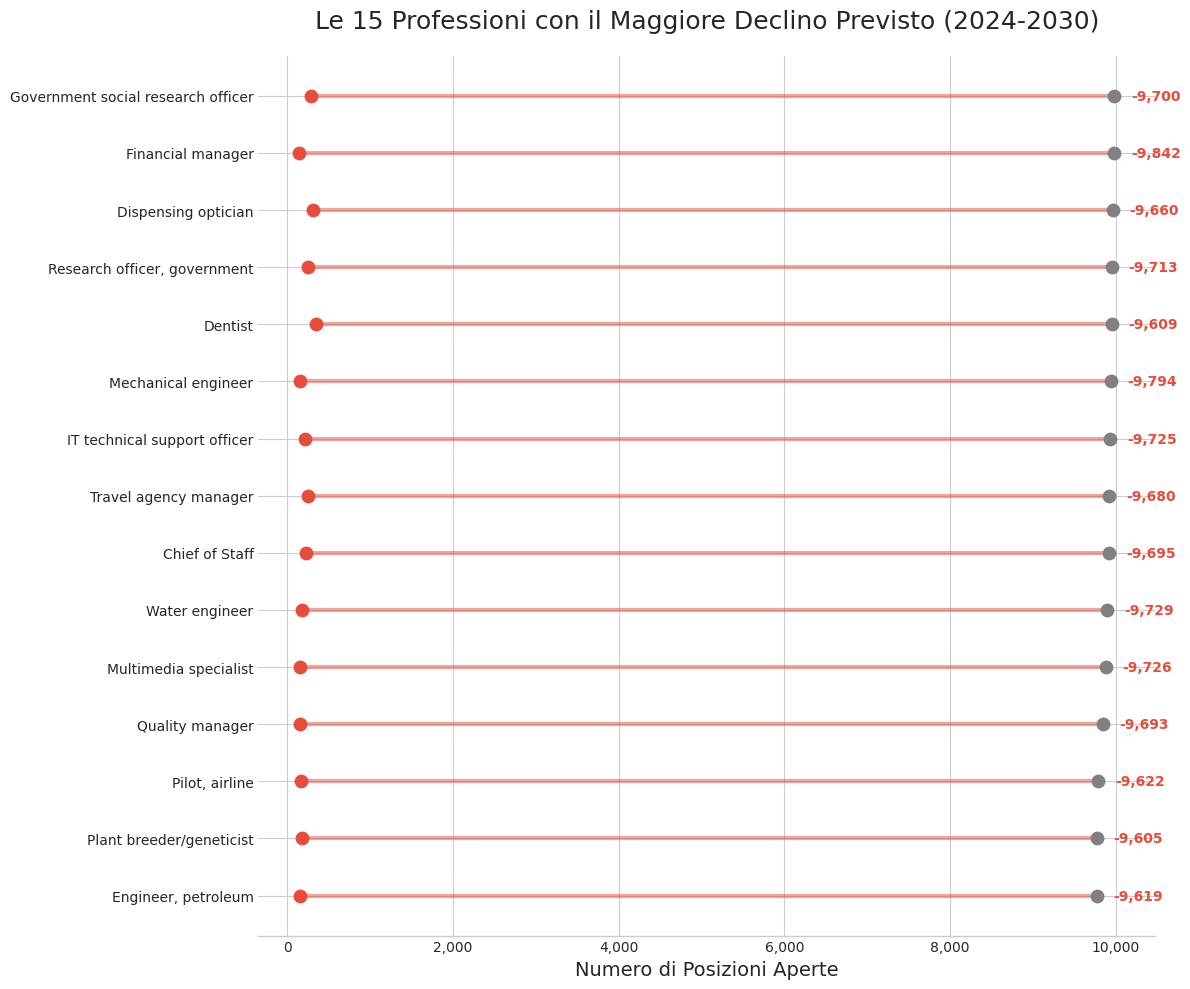

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/ai-impact-on-job-market-20242030/ai_job_trends_dataset.csv")
df['change'] = df['Projected Openings (2030)'] - df['Job Openings (2024)']
top_decline_jobs = df.sort_values('change', ascending=True).head(15)
top_decline_jobs = top_decline_jobs.sort_values('Job Openings (2024)', ascending=True)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 10))

for i, job in top_decline_jobs.iterrows():
    y_pos = job['Job Title']
    start_val = job['Job Openings (2024)']
    end_val = job['Projected Openings (2030)']
    change = end_val - start_val

    ax.plot([start_val, end_val], [y_pos, y_pos], color='#e74c3c', alpha=0.5, linewidth=3, zorder=1)
    
    ax.scatter(start_val, y_pos, color='grey', s=80, zorder=2)
    ax.scatter(end_val, y_pos, color='#e74c3c', s=80, zorder=2)
    
    ax.text(start_val + 200, y_pos, f'{change:,.0f}', color='#e74c3c', va='center', ha='left', fontsize=10, fontweight='bold')

ax.set_title('Le 15 Professioni con il Maggiore Declino Previsto (2024-2030)', fontsize=18, pad=20)
ax.set_xlabel('Numero di Posizioni Aperte', fontsize=14)
ax.set_ylabel('')

ax.spines[['top', 'right', 'left']].set_visible(False)
ax.tick_params(axis='y', length=0)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.savefig("lavori_in_declino.png")
plt.show()